In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import matplotlib.pyplot as plt
from ivis import Ivis

ModuleNotFoundError: No module named 'ivis'

In [12]:
iris = datasets.load_iris()
X = iris.data

# Scale the data to [0, 1]
X_scaled = MinMaxScaler().fit_transform(X)

# Set ivis parameters
model = Ivis(embedding_dims=2, k=15)

# Generate embeddings
embeddings = model.fit_transform(X_scaled)

# # Export model
# model.save_model('iris.ivis')

100%|██████████| 150/150 [00:00<00:00, 115566.79it/s]Building KNN index
Extracting KNN neighbours

100%|██████████| 150/150 [00:09<00:00, 15.04it/s]
Training neural network
Epoch 1/1000
2/2 [==============================] - 0s 2ms/step - loss: 1.0032
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.7779
Epoch 3/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.7299
Epoch 4/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6170
Epoch 5/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6615
Epoch 6/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6763
Epoch 7/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6659
Epoch 8/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.5922
Epoch 9/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.5893
Epoch 10/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6470
Epoch 11/1000
2/2 [=================

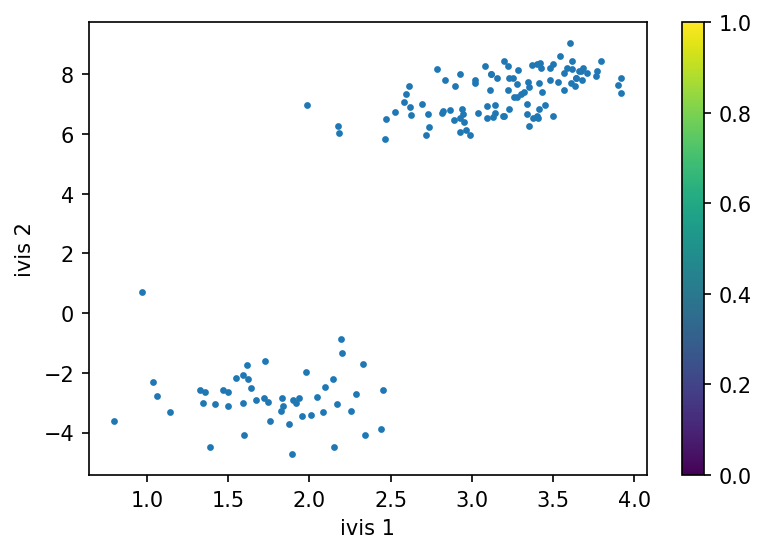

In [5]:
plt.figure(figsize=(6, 4), dpi=150)
sc = plt.scatter(x=embeddings[:, 0], y=embeddings[:, 1], s=5)
plt.xlabel('ivis 1')
plt.ylabel('ivis 2')
# plt.title('CST3')
plt.colorbar(sc)

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import roc_auc_score, auc
import time

C:\Users\tanis\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
df = pd.read_csv(r"C:\Users\tanis\Dropbox (Partners HealthCare)\NLP\Mia\Dementia_Data\progress_preprocessed_v3_labeled_2018_patientlevel.csv")
df

,Unnamed: 0,EMPI,all_reports,cognitive_tag
0,0,100006652,Editor Medical Assistant Prior authorization D...,1
1,1,100093092,"Editor , PT Physical Therapist Physical Therap...",0
2,2,100092284,"Editor , MD Physician No regular exercise Ingr...",1
3,3,100102092,"Editor , PA C Physician Assistant Chief Compla...",1
4,4,100101236,"Editor , MD Physician Reason for Visit Here fo...",0
...,...,...,...,...
762,762,102742794,Editor Medical Assistant Depression screen com...,1
763,763,102731850,"Editor , MD Physician Office Consultation Reas...",0
764,764,102722274,"Editor , MD, MPH Physician Martin Uni y.o. mal...",0
765,765,102643554,"Editor , MD Physician HEMATOLOGY PROGRESS NOTE...",1


In [13]:
X = df['all_reports']
y = df['cognitive_tag']
y_label = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.1, stratify=y_label)

In [14]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english",analyzer='word')
tfidf_train= tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_train  = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_test  = pd.DataFrame(tfidf_test.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_train = tfidf_train.to_numpy()
tfidf_test = tfidf_test.to_numpy()

In [17]:
print(tfidf_test.shape)

(77, 39996)


In [74]:
ivis = Ivis(embedding_dims=20, model='maaten',
           n_epochs_without_progress=5,
            )
ivis.fit(tfidf_train, y_train.values)

100%|██████████| 690/690 [00:02<00:00, 236.75it/s]Extracting KNN neighbours

100%|██████████| 690/690 [00:10<00:00, 65.06it/s]
Training neural network
Epoch 1/1000
6/6 [==============================] - 1s 209ms/step - loss: 1.2009 - stacked_triplets_loss: 1.1762 - supervised_loss: 1.2255
Epoch 2/1000
6/6 [==============================] - 1s 215ms/step - loss: 1.2917 - stacked_triplets_loss: 1.2050 - supervised_loss: 1.3785
Epoch 3/1000
6/6 [==============================] - 1s 213ms/step - loss: 1.2772 - stacked_triplets_loss: 1.4060 - supervised_loss: 1.1485
Epoch 4/1000
6/6 [==============================] - 1s 208ms/step - loss: 1.2050 - stacked_triplets_loss: 1.4325 - supervised_loss: 0.9775
Epoch 5/1000
6/6 [==============================] - 1s 210ms/step - loss: 1.1154 - stacked_triplets_loss: 1.4581 - supervised_loss: 0.7726
Epoch 6/1000
6/6 [==============================] - 1s 200ms/step - loss: 1.0091 - stacked_triplets_loss: 1.4064 - supervised_loss: 0.6119
Epoch 7/1000
6/

Ivis(annoy_index_path='annoy.index', callbacks=[], embedding_dims=20,
     model='maaten', n_epochs_without_progress=5,
     neighbour_matrix=<ivis.data.neighbour_retrieval.knn.AnnoyKnnMatrix object at 0x7f83b9c23940>)

In [75]:
train_embeddings = ivis.transform(tfidf_train)
test_embeddings = ivis.transform(tfidf_test)

3/3 [==============================] - 0s 9ms/step


In [76]:
train_embeddings.shape

(690, 20)

In [77]:
y_train.shape

(690,)

Text(0.5, 1.0, 'Testing Set')

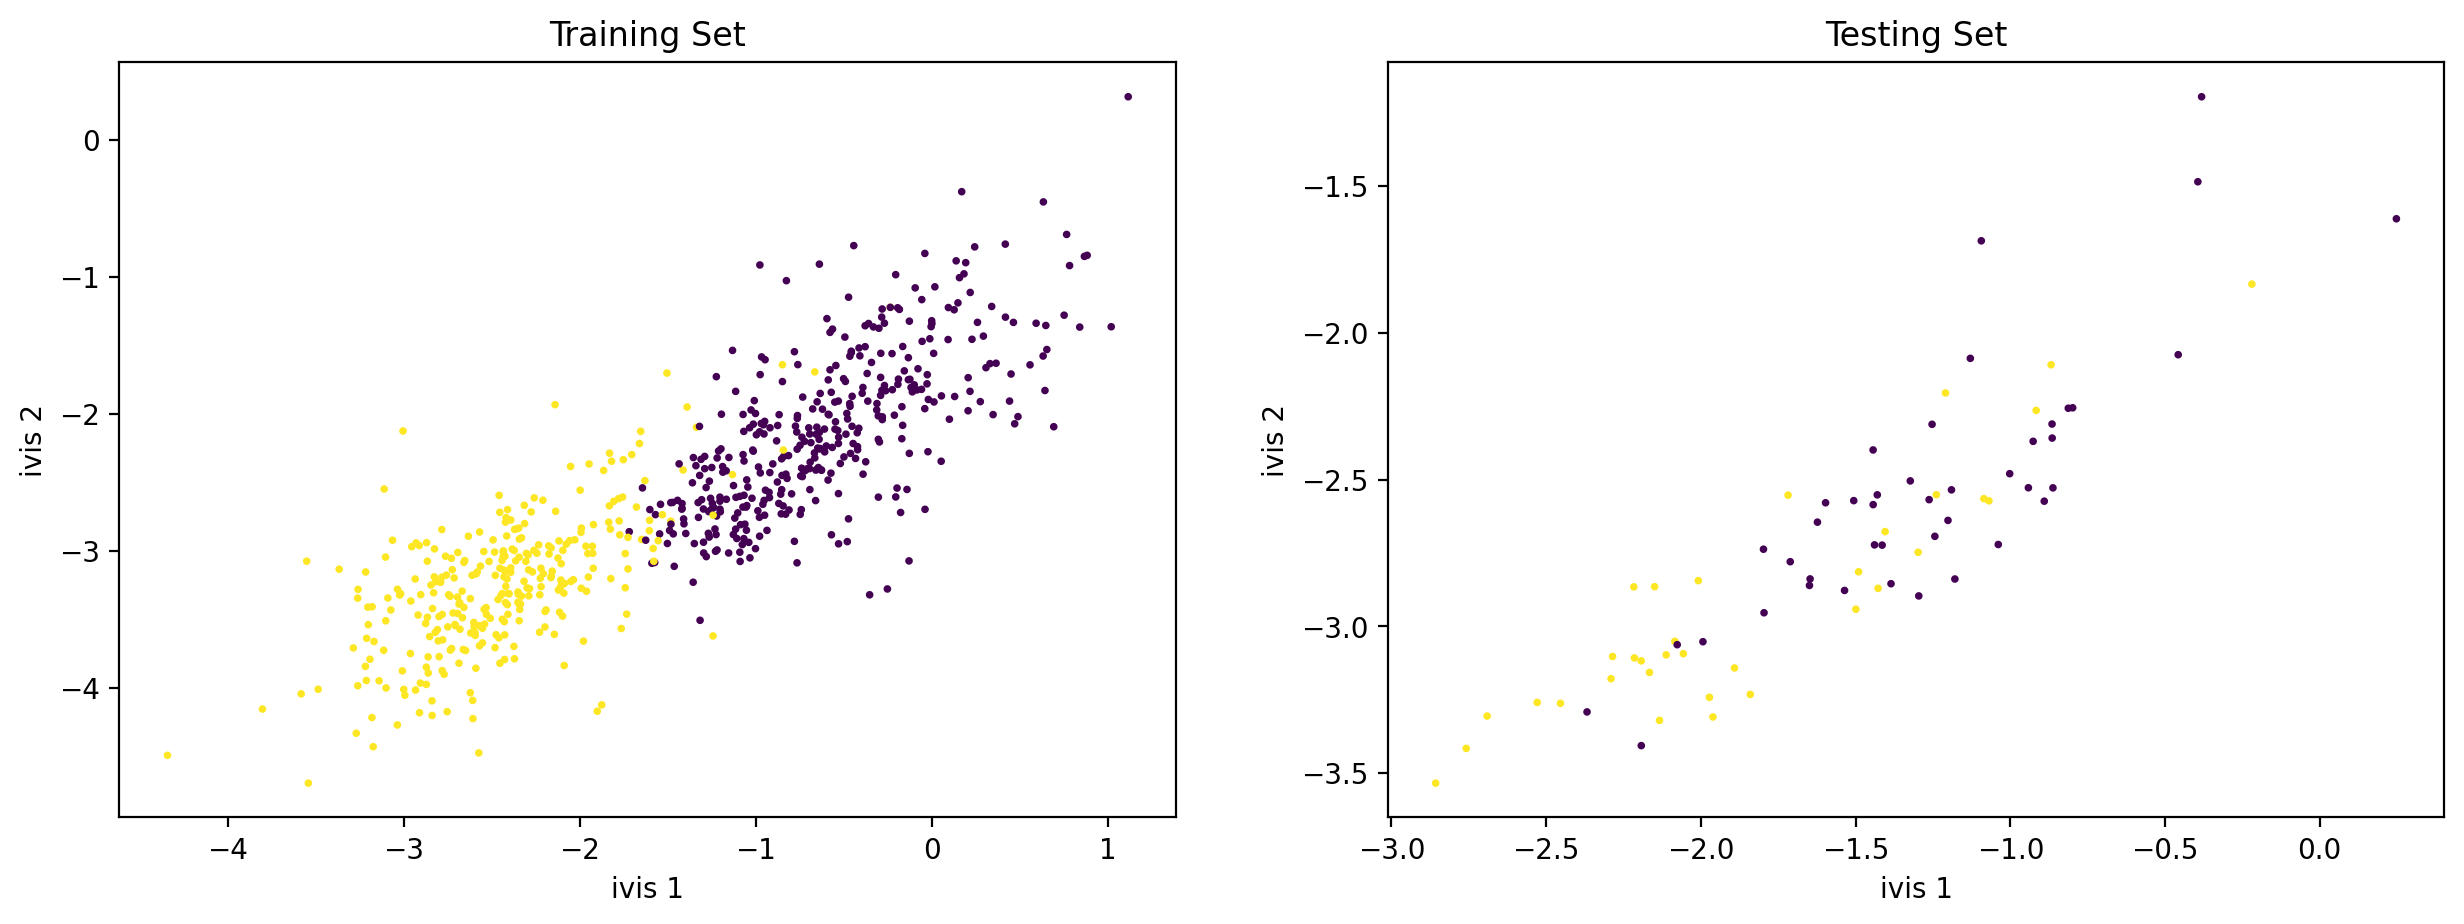

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=200)
ax[0].scatter(x=train_embeddings[:, 0], y=train_embeddings[:, 1], c=y_train, s=3)
ax[0].set_xlabel('ivis 1')
ax[0].set_ylabel('ivis 2')
ax[0].set_title('Training Set')

ax[1].scatter(x=test_embeddings[:, 0], y=test_embeddings[:, 1], c=y_test, s=3)
ax[1].set_xlabel('ivis 1')
ax[1].set_ylabel('ivis 2')
ax[1].set_title('Testing Set')

In [79]:
clf = LogisticRegression(solver="lbfgs").fit(train_embeddings, y_train)
labels = clf.predict(test_embeddings)
proba = clf.predict_proba(test_embeddings)

print(classification_report(y_test, labels))

print('Confusion Matrix')
print(confusion_matrix(y_test, labels))
print('Average Precision: '+str(average_precision_score(y_test, proba[:, 1])))
print('ROC AUC: '+str(roc_auc_score(y_test, labels)))

precision    recall  f1-score   support

           0       0.79      0.77      0.78        43
           1       0.71      0.74      0.72        34

    accuracy                           0.75        77
   macro avg       0.75      0.75      0.75        77
weighted avg       0.75      0.75      0.75        77

Confusion Matrix
[[33 10]
 [ 9 25]]
Average Precision: 0.8423747807095527
ROC AUC: 0.7513679890560876
